In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
overall_raw = pd.read_excel("../data/raw/CPIOverall.xlsx")
housing_raw = pd.read_excel("../data/raw/Housing.xlsx")
apparel_raw = pd.read_excel("../data/raw/Apparel.xlsx")
transportation_raw = pd.read_excel("../data/raw/Transportation.xlsx")
education_raw = pd.read_excel("../data/raw/Education.xlsx")
medical_raw = pd.read_excel("../data/raw/MedicalCare.xlsx")
food_raw = pd.read_excel("../data/raw/Food.xlsx")
recreation_raw = pd.read_excel("../data/raw/Recreation.xlsx")
other_goods_raw = pd.read_excel("../data/raw/OtherGoods.xlsx")


In [3]:
# data transformation into time series data
def transform_data(df,name):
    transformed_data = []
    months = df.loc[:, df.columns.drop("Year")].columns
    for data_tuple in df.itertuples():
        year = getattr(data_tuple, 'Year')
        if year > 1994:
            for month in months:
                value = getattr(data_tuple, month)
                transformed_data.append(
                    ['01' + ' ' + str(month) + ' ' + str(year), value])
    transformed_df = pd.DataFrame(transformed_data, columns=['time', name])
    transformed_df['time'] = pd.to_datetime(transformed_df['time'])
    return transformed_df


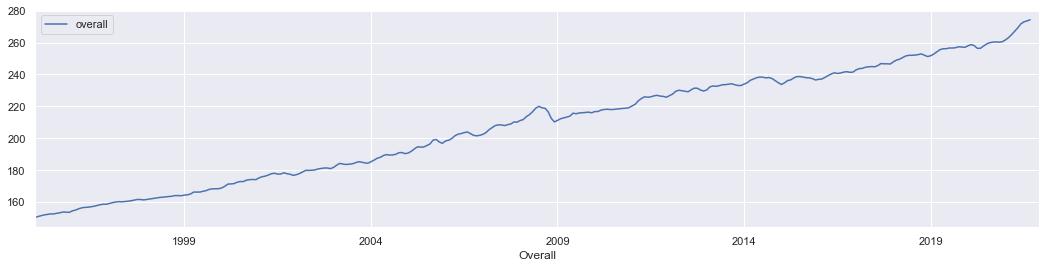

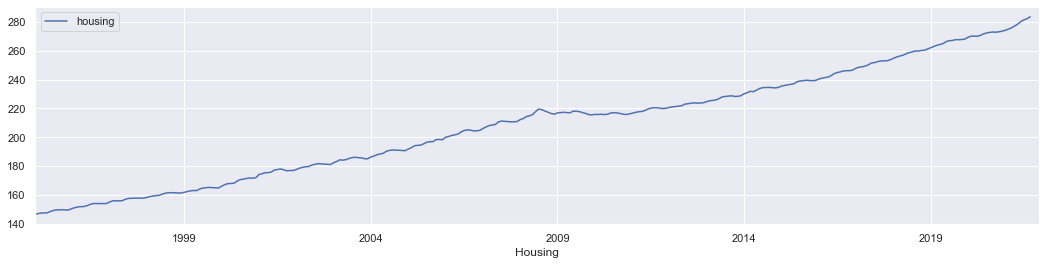

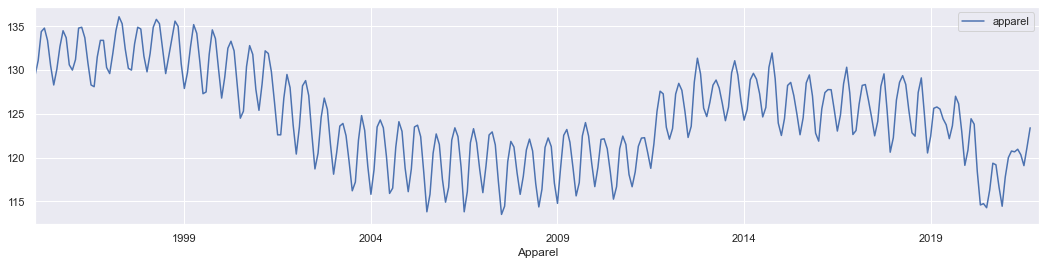

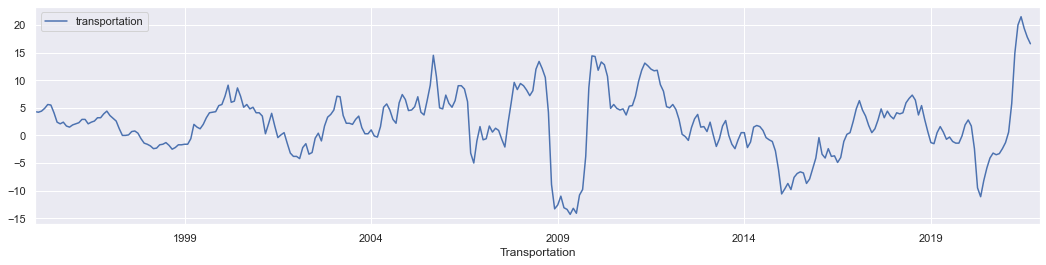

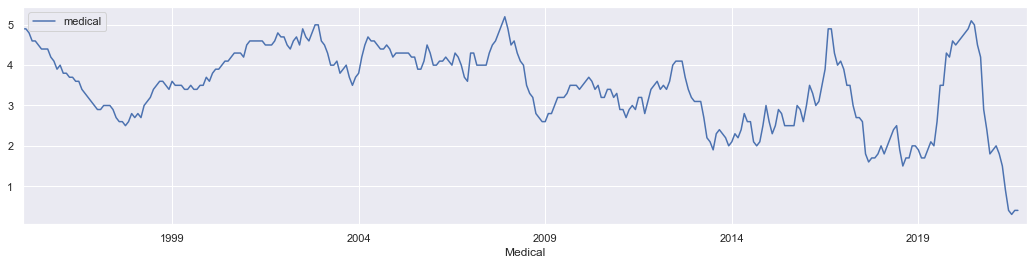

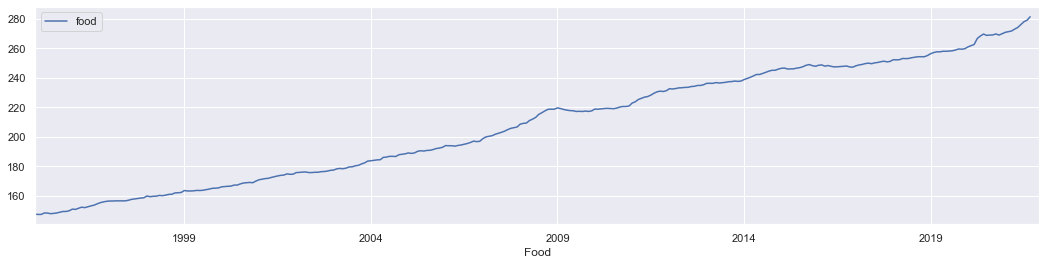

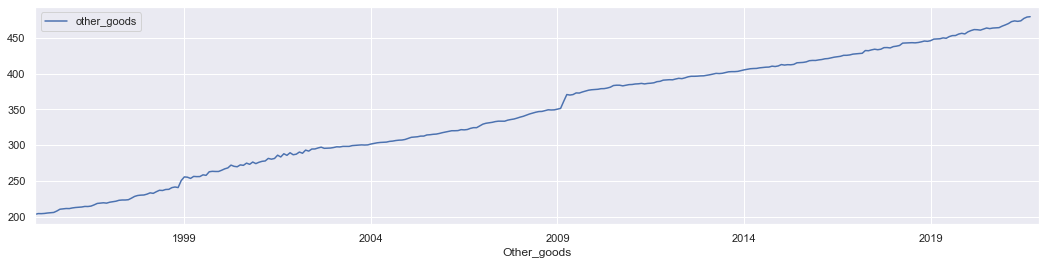

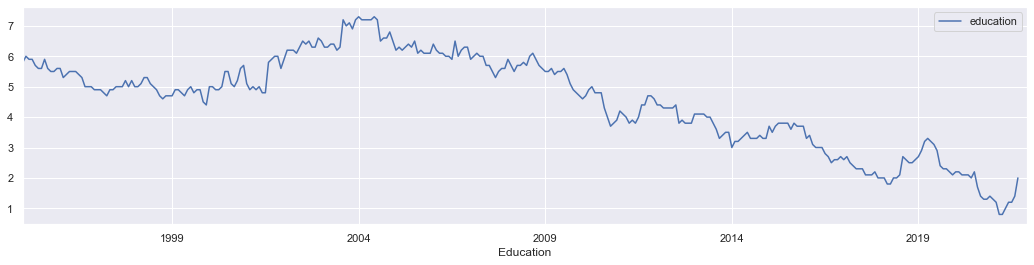

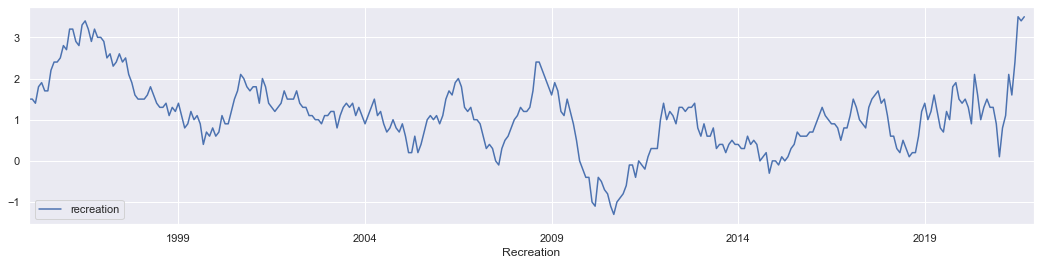

In [4]:
cpi_factors = [
    {'overall': overall_raw},
    {'housing': housing_raw},
    {'apparel': apparel_raw},
    {'transportation': transportation_raw},
    {'medical': medical_raw},
    {'food': food_raw},
    {'other_goods': other_goods_raw},
    {'education': education_raw},
    {'recreation': recreation_raw},
]
sns.set(rc={'figure.figsize': (18, 4)})

for cpi_factor in cpi_factors:
    name = cpi_factor.keys()
    name = list(name)[0]
    cpi_factor = transform_data(cpi_factor[name],name)
    file_path = '../data/processed/{}.xlsx'.format(name)
    cpi_factor.to_excel(file_path)
    cpi_factor.plot(x='time', y=name)
    plt.xlabel(name.capitalize())

In [5]:
overall = pd.read_excel("../data/processed/overall.xlsx")
housing = pd.read_excel("../data/processed/housing.xlsx")
apparel = pd.read_excel("../data/processed/apparel.xlsx")
transportation = pd.read_excel("../data/processed/transportation.xlsx")
education = pd.read_excel("../data/processed/education.xlsx")
medical = pd.read_excel("../data/processed/medical.xlsx")
food = pd.read_excel("../data/processed/food.xlsx")
recreation = pd.read_excel("../data/processed/recreation.xlsx")
other_goods = pd.read_excel("../data/processed/other_goods.xlsx")


In [6]:
overall = overall[overall.columns[1:3]]
housing = housing[housing.columns[1:3]]
apparel = apparel[apparel.columns[1:3]]
transportation = transportation[transportation.columns[1:3]]
education = education[education.columns[1:3]]
medical = medical[medical.columns[1:3]]
food = food[food.columns[1:3]]
recreation = recreation[recreation.columns[1:3]]
other_goods = other_goods[other_goods.columns[1:3]]

In [7]:
final = pd.concat([overall,housing,apparel,transportation,medical,food,other_goods,education,recreation],axis=1)
final = final.loc[:,~final.columns.duplicated()]
final.to_excel('../data/processed/final.xlsx')